# Preprocess the Roshambo dataset


[8962, 8933, 8989, 8990, 8985]
[8962, 8933, 8989, 8990, 8985]


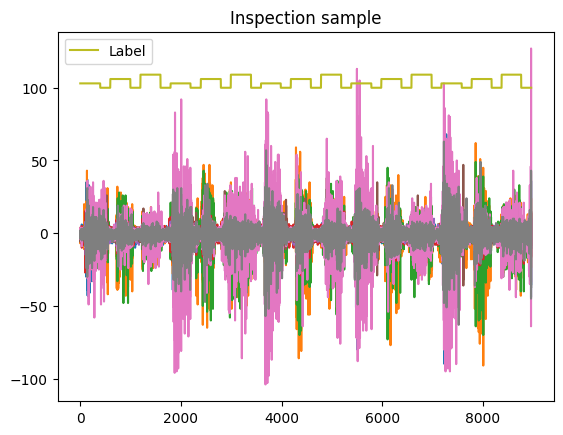

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt

# Specify the folder path
folder_path = "data/"

# Find all .npy files in the folder
emg_paths = glob.glob(folder_path + "*_emg.npy")
label_paths = glob.glob(folder_path + "*_ann.npy")

emg_paths.sort()
label_paths.sort()

mapping = {
    b"none": 0,
    "none": 0,
    b"rock": 1,
    "rock": 1,
    b"paper": 2,
    "paper": 2,
    b"scissor": 3,
    "scissor": 3,
}

# Load each .npy file
data = []
for file_path in emg_paths:
    arr = np.load(file_path)
    data.append(arr)

labels = []
for file_path in label_paths:
    arr = np.load(file_path)
    a = np.array([mapping[x] for x in arr])
    labels.append(a)

# See if the lengths match
print([len(x) for x in data[:5]])
print([len(x) for x in labels[:5]])

plt.plot(data[0])
plt.plot(labels[0] * 3 + 100, label="Label")
plt.legend()
plt.title("Inspection sample")
plt.show()

(150, 400, 8)


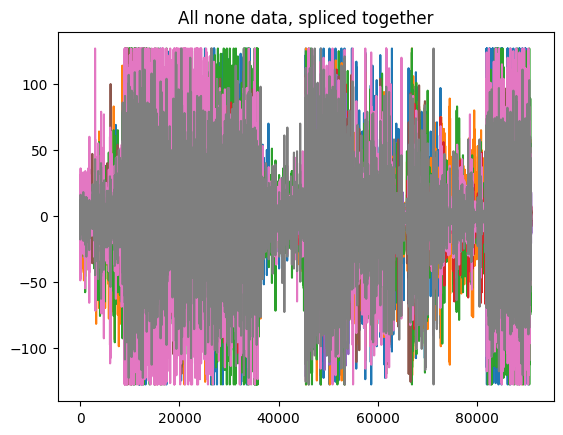

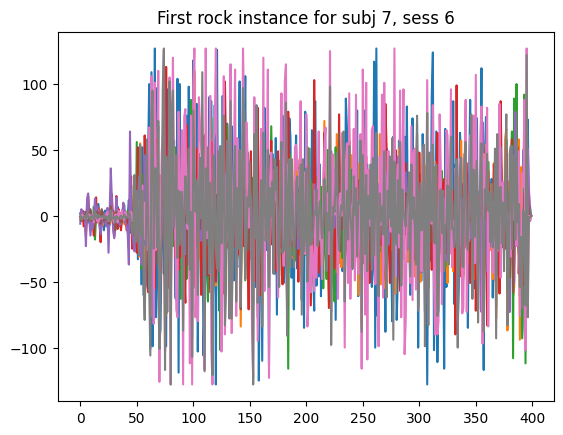

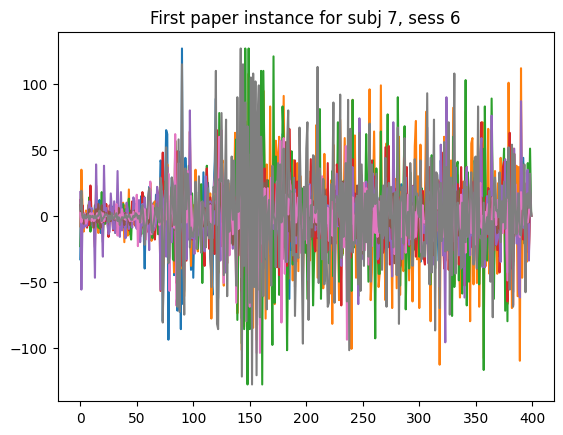

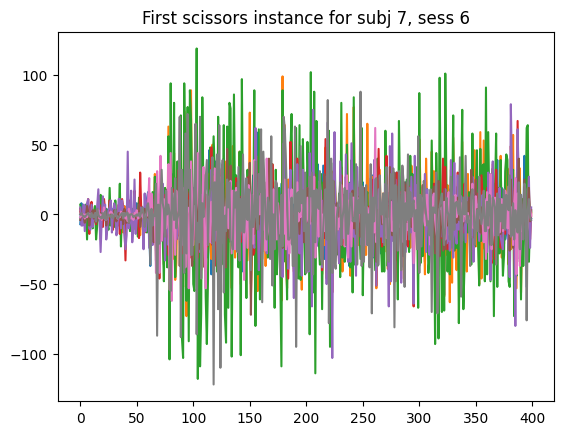

In [2]:
def split_array(arr, num_splits=5):
    split_arrs = np.array_split(arr, num_splits)
    for idx, spl_arr in enumerate(split_arrs):
        if len(spl_arr) < 400:
            # pad to 400
            split_arrs[idx] = np.pad(spl_arr, ((0, 400 - len(spl_arr)), (0, 0)))
        elif len(spl_arr) > 400:
            # trim to 400
            split_arrs[idx] = spl_arr[:400]
    return split_arrs


# We have a label for each timstep of the data
# Select all the data that is labeled as 1:
none_data = []
rock_data = []
paper_data = []
scissor_data = []
for idx, sample in enumerate(data):
    # time, 8 channels
    time_labels = labels[idx]
    labels_0 = np.where(time_labels == 0)[0]
    labels_1 = np.where(time_labels == 1)[0]
    labels_2 = np.where(time_labels == 2)[0]
    labels_3 = np.where(time_labels == 3)[0]

    none_data.extend(sample[labels_0])
    rock_data.extend(split_array(sample[labels_1]))
    paper_data.extend(split_array(sample[labels_2]))
    scissor_data.extend(split_array(sample[labels_3]))

idx = np.random.randint(0, len(rock_data))

none_data = np.array(none_data)
rock_data = np.array(rock_data)
paper_data = np.array(paper_data)
scissor_data = np.array(scissor_data)
print(rock_data.shape)


plt.plot(none_data)
plt.title("All none data, spliced together")
plt.show()

# rock_data: 30 sequences of only rock data (5 instances of rock each)
plt.plot(rock_data[idx])
# [plt.axvline(x=j, color='r') for j in range(0, 2000, 400)]
plt.title(f"First rock instance for subj {idx//10}, sess {idx%10}")
plt.show()

plt.plot(paper_data[idx])
# [plt.axvline(x=j, color='r') for j in range(0, 2000, 400)]
plt.title(f"First paper instance for subj {idx//10}, sess {idx%10}")
plt.show()

plt.plot(scissor_data[idx])
# [plt.axvline(x=j, color='r') for j in range(0, 2000, 400)]
plt.title(f"First scissors instance for subj {idx//10}, sess {idx%10}")
plt.show()

In [3]:
rock_data = rock_data.reshape(-1, 400, 8)
paper_data = paper_data.reshape(-1, 400, 8)
scissor_data = scissor_data.reshape(-1, 400, 8)

rock_labels = np.ones((rock_data.shape[0]))
paper_labels = np.ones((paper_data.shape[0])) * 2
scissor_labels = np.ones((scissor_data.shape[0])) * 3

print(rock_labels.shape, paper_labels.shape, scissor_labels.shape)

(150,) (150,) (150,)


In [4]:
X = np.concatenate([rock_data, paper_data, scissor_data])
y = np.concatenate([rock_labels, paper_labels, scissor_labels])

print(X.shape)
print(y.shape)

np.save("X_roshambo.npy", X)
np.save("y_roshambo.npy", y)

(450, 400, 8)
(450,)
